

# Project: Investigate the tmdb_movies Dataset to explore movie ratings

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> I chose to explore the tmdb-movies dataset.  I plan on looking at which production companies released the highest rated movies, and if budget was a factor in the ratings of the movie.  I also would like see if higher ratings correlates with higher revenue.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


movies_df = pd.read_csv('tmdb-movies - tmdb-movies.csv')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster;dna;tyrannosaurus rex;velociraptor;island,Twenty-two years after the events of Jurassic ...,124,Action;Adventure;Science Fiction;Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,future;chase;post-apocalyptic;dystopia;australia,An apocalyptic story set in the furthest reach...,120,Action;Adventure;Science Fiction;Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel;revolution;dystopia;sequel;dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure;Science Fiction;Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08




### Data Cleaning (Replace this with more specific notes!)

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 19 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), in

In [4]:
# Exploring the number of rows and columns for this dataset
movies_df.shape

(10866, 19)

In [5]:
# Exploring some general statistics about this dataset
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Checking the data type for each column
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
#Exploring the number of unique values in each column
movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
director                 5066
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# Using drop_duplictes to remove duplicated rows
movies_df.drop_duplicates(inplace=True)

In [9]:
# Checking to see the number of rows per column after dropping duplicated rows
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 19 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), in

In [10]:
# The vote average, revenue and budget columns need to be converted from a float64 to an int.
movies_df['revenue_adj'] = movies_df['revenue_adj'].astype(int)
movies_df['budget_adj'] = movies_df['budget_adj'].astype(int)


In [11]:
# Check the column types to see if the data type is now int
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 19 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null int64
revenue_adj             10865 non-null int64
dtypes: float64(2), int64(

In [12]:
movies_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster;dna;tyrannosaurus rex;velociraptor;island,Twenty-two years after the events of Jurassic ...,124,Action;Adventure;Science Fiction;Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445893
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,future;chase;post-apocalyptic;dystopia;australia,An apocalyptic story set in the furthest reach...,120,Action;Adventure;Science Fiction;Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939,348161292
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel;revolution;dystopia;sequel;dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure;Science Fiction;Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955,271619025


In [13]:
# Drop production companies with Nan
movies_df.dropna(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 10865
Data columns (total 19 columns):
id                      7042 non-null int64
imdb_id                 7042 non-null object
popularity              7042 non-null float64
budget                  7042 non-null int64
revenue                 7042 non-null int64
original_title          7042 non-null object
director                7042 non-null object
tagline                 7042 non-null object
keywords                7042 non-null object
overview                7042 non-null object
runtime                 7042 non-null int64
genres                  7042 non-null object
production_companies    7042 non-null object
release_date            7042 non-null object
vote_count              7042 non-null int64
vote_average            7042 non-null float64
release_year            7042 non-null int64
budget_adj              7042 non-null int64
revenue_adj             7042 non-null int64
dtypes: float64(2), int64(8), object(9)
mem

In [14]:
movies_df.groupby(['production_companies','vote_average'],as_index=False)['vote_count'].mean()

,production_companies,vote_average,vote_count
0,10th Hole Productions|Anonymous Content|Ambush...,5.7,63.0
1,120dB Films|Pimienta|The Salt Company Internat...,4.9,81.0
2,120dB Films|Scion Films|Voodoo Production Serv...,5.3,55.0
3,1492 Pictures|Dune Entertainment|Fox 2000 Pict...,5.9,1039.0
4,1492 Pictures|Warner Bros.|Heyday Films,7.2,4265.0
5,1492 Pictures|Warner Bros.|Heyday Films|MIRACL...,7.2,3458.0
6,1492 Pictures|Warner Bros.|Heyday Films|P of A...,7.4,3550.0
7,1818|Lone Wolf McQuade Associates|Topkick Prod...,5.2,27.0
8,185 Trax|7th Sense Films,5.6,12.0
9,2003 Productions|Warner Bros. France|TF1 Films...,6.9,195.0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - Which production companies released the highest rated movies?

In [15]:
# Vote_count was included in the query because some top voted movies only had 10 votes, which skews the validity of the rating
# Which production companies are associated with higher rated movies?
top_movies = movies_df.query('vote_average > 7.7 & vote_count > 2000')
top_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01
mean,55043.444444,6.548699,5.741250e+07,4.126353e+08,139.833333,4115.083333,7.952778,2000.583333,6.622285e+07,5.969176e+08
std,82087.850162,4.244018,5.759212e+07,3.212373e+08,30.821607,1865.276806,0.150211,12.818235,5.269493e+07,5.669481e+08
min,11.000000,0.695385,1.200000e+06,1.399309e+07,94.000000,2012.000000,7.800000,1972.000000,1.864829e+06,1.288891e+07
25%,217.250000,3.929531,1.700000e+07,1.583693e+08,117.500000,2494.750000,7.800000,1993.750000,2.649678e+07,1.714844e+08
50%,641.500000,5.916664,3.117500e+07,3.242888e+08,134.500000,3860.000000,7.900000,2001.500000,4.742528e+07,4.525296e+08
75%,118871.750000,8.099134,8.250000e+07,6.585654e+08,157.750000,5410.250000,8.025000,2013.250000,9.414466e+07,8.684583e+08
max,244786.000000,24.949134,1.850000e+08,1.118889e+09,201.000000,9767.000000,8.400000,2015.000000,1.873655e+08,2.789712e+09


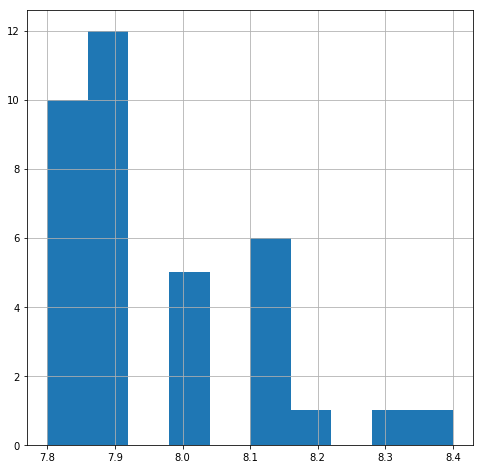

In [16]:
# A histogram to see what the data looks like
top_movies['vote_average'].hist(figsize=(8,8));

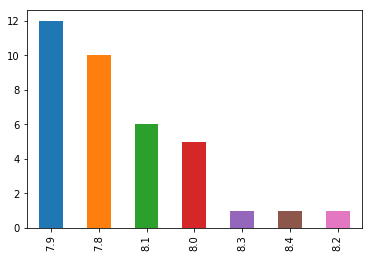

In [17]:
# A bar graph to see what the vote average looks like
top_movies['vote_average'].value_counts().plot(kind = 'bar');

In [18]:
# The list of production companies is big, so lets narrow it down
top_prod_co = top_movies[top_movies['vote_average'] > 8.0]
sum(top_prod_co['production_companies'].value_counts())


9

In [19]:
# Let's see who the top nine production companies are by vote average
top_prod_co.groupby(['production_companies','vote_average']).mean()

,,id,popularity,budget,revenue,runtime,vote_count,release_year,budget_adj,revenue_adj
production_companies,vote_average,,,,,,,,,
Bold Films|Blumhouse Productions|Right of Way Films,8.2,244786,4.780419,3300000,13993093,105,2372,2014,3039600,12888912
Castle Rock Entertainment,8.4,278,7.192039,25000000,28341469,142,5754,1994,36777789,41693462
DC Comics|Legendary Pictures|Warner Bros.|Syncopy,8.1,155,8.466668,185000000,1001921825,152,8432,2008,187365527,1014733032
Miramax Films|A Band Apart|Jersey Films,8.1,680,8.093754,8000000,213928762,154,5343,1994,11768892,314713075
Paramount Pictures,8.1,13,6.715966,55000000,677945399,142,4856,1994,80911135,997333314
Paramount Pictures|Alfran Productions,8.3,238,5.738034,6000000,245066411,175,3970,1972,31287365,1277913732
Paramount Pictures|The Coppola Company,8.1,240,3.264571,13000000,47542841,200,2131,1974,57489690,210247939
Regency Enterprises|Fox 2000 Pictures|Taurus Film|Linson Films|Atman Entertainment,8.1,550,8.947905,63000000,100853753,139,5923,1999,82470329,132022892
Universal Pictures|Amblin Entertainment,8.1,424,2.377288,22000000,321265768,195,2632,1993,33208339,484941026


### Research Question 2  - Does the movie budget impact the vote average?

In [21]:
#  Let's explore the average budget, but first lets break down our data into ranking and add a column
movies_df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7042.000000,7042.000000,7.042000e+03,7.042000e+03,7042.000000,7042.000000,7042.000000,7042.000000,7.042000e+03,7.042000e+03
mean,51994.809003,0.828574,2.081139e+07,5.923193e+07,104.771372,312.294661,6.015038,1999.393070,2.497112e+07,7.632204e+07
std,81489.917156,1.179591,3.600430e+07,1.403260e+08,23.906964,692.768380,0.877055,13.463433,3.951577e+07,1.729381e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9543.250000,0.278318,0.000000e+00,0.000000e+00,92.000000,24.000000,5.500000,1992.000000,0.000000e+00,0.000000e+00
50%,14744.000000,0.505567,5.000000e+06,4.784108e+06,101.000000,73.000000,6.100000,2003.000000,6.792301e+06,6.396820e+06
75%,47077.250000,0.954703,2.600000e+07,5.467266e+07,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.503716e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [23]:
# Create a vote_group column
bin_edges = [1.50, 5.50, 6.10, 6.60, 8.40]
bin_names = ['Low','Medium','Mod high','High']

movies_df['vote_group'] = pd.cut(movies_df['vote_average'], bin_edges, labels = bin_names)

In [25]:
movies_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_group
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster;dna;tyrannosaurus rex;velociraptor;island,Twenty-two years after the events of Jurassic ...,124,Action;Adventure;Science Fiction;Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445893,Mod high
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,future;chase;post-apocalyptic;dystopia;australia,An apocalyptic story set in the furthest reach...,120,Action;Adventure;Science Fiction;Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939,348161292,High


In [35]:
# Looking at the average budget by vote group
movies_df.groupby(['vote_group'], as_index=False)['budget'].mean().round()

,vote_group,budget
0,Low,15976565.0
1,Medium,21755415.0
2,Mod high,23653033.0
3,High,22759166.0


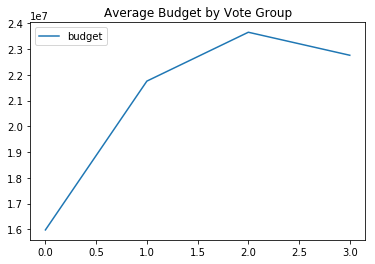

In [36]:
# A line graph of the average budget by vote group
movies_df.groupby(['vote_group'], as_index=False)['budget'].mean().round().plot(kind = 'line', title = 'Average Budget by Vote Group')

In [37]:
# Does higher vote average correlate with higher revenue?
movies_df.groupby(['vote_group'], as_index=False)['revenue'].mean().round()

,vote_group,revenue
0,Low,23418607.0
1,Medium,53393831.0
2,Mod high,69957300.0
3,High,97601520.0


In [52]:
# Let's see a visual showing the possible relationship between vote average and revenue
# First let's put our vote_group's into dataframes
low= movies_df[movies_df['vote_group'] == 'Low']
low_rev = round(low['revenue'].mean())
low_rev

23418607.0

In [54]:
# continue putting vote_group's into dataframes
medium = movies_df[movies_df['vote_group'] == 'Medium']
med_rev = round(medium['revenue'].mean())
mod_high = movies_df[movies_df['vote_group'] == 'Mod high']
mod_high_rev = round(mod_high['revenue'].mean())
high = movies_df[movies_df['vote_group'] == 'High']
high_rev = round(high['revenue'].mean())

In [55]:
med_rev

53393831.0

Text(0,0.5,'Average Revenue')

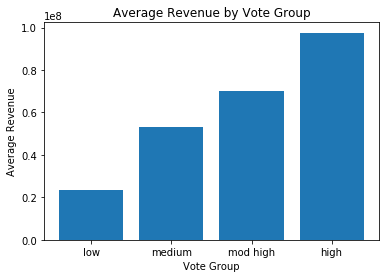

In [58]:
# Create a bar chart for the vote groups and revenue
locations = [1, 2, 3, 4]
heights = [low_rev, med_rev, mod_high_rev, high_rev]
labels = ['low', 'medium', 'mod high', 'high']
plt.bar(locations, heights, tick_label = labels)
plt.title ('Average Revenue by Vote Group')
plt.xlabel('Vote Group')
plt.ylabel('Average Revenue')

<a id='conclusions'></a>
## Conclusions

> Question 1 - The top rated production companies by vote average included Castlerock Entertainment and Paramount.

> Question 2 - The highest budget didn't seem to guarantee the highest vote average.

> Question 3 - The highest revenue did seem to correlate with the highest vote average.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0